# Project 2: Sequence Alignment and Phylogeny


   <div class="alert alert-block alert-danger">
    <center>Due: <b>Wednesday, 21 September, 8:59pm</b>.</center> 
   </div>
   
   <div class="alert alert-block alert-warning">
   <center>
       <b>Collaboration and Resource Policy</b>
    </center>
    For this assignment, you are encouraged to work with one other person. Your team must satisfy these constraints:
    
   1. You **did not work together on Project 1**.
   2. You and your partner have a **total number of siblings that is divisible by two** (e.g., if you have one sibling, you need to find a partner with 1, 3, 5, or 7 siblings. If anyone has more than 7 siblings, they can partner with anyone!)
    
We expect most students will have the best learning experience on this assignment by working with a partner, but if you prefer to work alone it is permissible to do this assignment on your own.
    
You are encouraged to discuss these problems with anyone you want, including other students in the class. If you do discuss the specific questions in the assignment with anyone other than your assignment partner and the course staff, though, you should list them in the _External resources used_ section below.
    
You are welcome to use any resources you want for this assignment, other than ones that would defeat the purpose of the assignment. This means you should not look at answers or code from any other students in the class (other than your collaboration with your partner) or from previous offerings of this course, and if you find code that implements the problem you are being asked to do for the assignment, you should not use that code. 

You should document all external resource you use that are not part of the course materials in the _External resources used_ section below.
    </div>

**Team submitting this assignment:**  
<div class="alert alert-success">
    <b><em>list each member of your team here, including both your name and UVA computing id</em></b>
</div>
Jenna Herman jh3fc, Emma Forrestal ecf5rcw

**External resources used:** 
<div class="alert alert-success">
<em>It is not necessary to list the course materials, but if you used any other resources, including discussing problems with students not on your team, list them here.</em>
</div>
Discussed with Sarah Murphy

 <div class="alert alert-block alert-warning">
    
<b>Submission</b>: Please submit the code you wrote to generate your answers for all parts using this form: https://forms.gle/gv144kv3KRo67uUX7. Your answers should be in the Jupyter Notebook, along with your code. Before submission, you should make a copy of your notebook file with the name uvaid1\_uvaid2.ipynb (where uvaidn is each teammates UVA id) so the submitted file identifies you. You and your partner should submit a single file once together. Submission is due 8:59 pm on Wednesday, 21 September.

## Getting Started

Install basic required packages, should be run only once. You may need to restart the jupyter python kernel (under the Kernel menu) after this. (You can execute this directly in the notebook but running the command below.)

In [181]:
%pip install -r requirements.txt

  Cloning https://github.com/iamgroot42/blosum.git to /private/var/folders/wd/hcpwc24x7354wrbwfblgvjgm0000gn/T/pip-req-build-k0q6__fc
  Running command git clone --filter=blob:none --quiet https://github.com/iamgroot42/blosum.git /private/var/folders/wd/hcpwc24x7354wrbwfblgvjgm0000gn/T/pip-req-build-k0q6__fc
  Resolved https://github.com/iamgroot42/blosum.git to commit 433ed2f1b55fa010ad1b4b2a84158c1f38ddeaf6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip3.7 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [182]:
import numpy as np
import blosum as bl
import networkx as nx
import matplotlib.pyplot as plt
import utils
from itertools import chain

## Part 1: Global Sequence Alignment

Below we provide the sequence alignment code from [Class 6](https://computingbiology.github.io/class6/). You are welcome to use and modify this code however you want in your solution, but should answer the questions below based on this provided code.

In [3]:
def simpleMatch(a, b):
    return 1 if a == b else -1

def distanceMatch(a, b):
    return 0 if a == b else -1

def linearGap(n):
    return -1 * n

def alignmentScore(s1, s2, gapPenalty, match):
    if not s1 or not s2:
        return gapPenalty(len(s1)) + gapPenalty(len(s2))
    else:
        return max(gapPenalty(1) + alignmentScore(s1, s2[1:], gapPenalty, match), 
                   gapPenalty(1) + alignmentScore(s1[1:], s2, gapPenalty, match),
                   match(s1[0], s2[0]) + alignmentScore(s1[1:], s2[1:], gapPenalty, match)) 

In [4]:
def alignmentScoreDP(s1, s2, gapPenalty, match):
    m = np.zeros((len(s1) + 1, len(s2) + 1))
    m[0, 0] = 0
    for i in range(1, len(s1) + 1):
        m[i, 0] = gapPenalty(i)
    for j in range(1, len(s2) + 1):
        m[0, j] = gapPenalty(j)
    for i in range(1, len(s1) + 1):
        for j in range(1, len(s2) + 1):
            m[i, j] = max(gapPenalty(1) + m[i, j - 1],  
                          gapPenalty(1) + m[i - 1, j],    
                          match(s1[i - 1], s2[j - 1]) + m[i - 1, j - 1]) 
    return m
    
def readAlignment(s1, s2, m, gapPenalty, match):
    i = len(s1)
    j = len(s2)
    s1a = ""
    s2a = "" 
    score = 0
    while i > 0 or j > 0:
        if i > 0 and j > 0 and m[i, j] == m[i - 1, j - 1] + match(s1[i - 1], s2[j - 1]):
            i = i - 1
            j = j - 1
            score += match(s1[i], s2[j])
            s1a = s1[i] + s1a
            if s1[i] == s2[j]:
                s2a = s2[j] + s2a
            else:
                s2a = s2[j].lower() + s2a
        elif i > 0 and m[i, j] == m[i - 1, j] + gapPenalty(1):
            i = i - 1
            score += gapPenalty(1)
            s1a = s1[i] + s1a
            s2a = '-' + s2a
        elif j > 0 and m[i, j] == m[i, j - 1] + gapPenalty(1):
            j = j - 1
            score += gapPenalty(1)
            s1a = '-' + s1a
            s2a = s2[j] + s2a
        else:
            assert False
    return (s1a, s2a, score)

def showAlignment(s1, s2, gapPenalty, match):
    m = alignmentScoreDP(s1, s2, gapPenalty, match)
    r = readAlignment(s1, s2, m, gapPenalty, match)
    print (r[0] + "\n" + r[1] + "\n" + str(r[2]))
    return (m, r)

In [5]:
# Example
r = showAlignment("GATT", "GCAT", linearGap, simpleMatch)

G-ATT
GCA-T
1


Here's the version that supports affine gap penalties (from Class 6):

In [6]:
def alignmentScoreDPG(s1, s2, gapPenalty, match):
    m = np.zeros((len(s1) + 1, len(s2) + 1))
    m[0, 0] = 0
    for i in range(1, len(s1) + 1):
        m[i, 0] = gapPenalty(i)
    for j in range(1, len(s2) + 1):
        m[0, j] = gapPenalty(j)
    for i in range(1, len(s1) + 1):
        for j in range(1, len(s2) + 1):         
            m[i, j] = max(chain((gapPenalty(g) + m[i, j - g] for g in range(1, j+1)),
                                (gapPenalty(g) + m[i - g, j] for g in range(1, i+1)),   
                                [(match(s1[i - 1], s2[j - 1]) + m[i - 1, j - 1])]))
    return m
    
def readAlignmentG(s1, s2, m, gapPenalty, match):
    i = len(s1)
    j = len(s2)
    s1a = ""
    s2a = ""
    score = 0
    while i > 0 or j > 0:
        if i > 0 and j > 0 and m[i, j] == m[i - 1, j - 1] + match(s1[i - 1], s2[j - 1]):
            i = i - 1
            j = j - 1
            s1a = s1[i] + s1a
            s2a = (s2[j] if s1[i] == s2[j] else s2[j].lower()) + s2a
            score += match(s1[i], s2[j])
        else:
            foundit = False
            for g in range(1, i + 1):
                if m[i, j] == m[i - g, j] + gapPenalty(g):
                    s1a = s1[i - g:i] + s1a
                    s2a = ('-' * g) + s2a
                    i = i - g
                    score += gapPenalty(g)
                    foundit = True
                    break
            if not foundit:
                for g in range(1, j + 1):
                    if m[i, j] == m[i, j - g] + gapPenalty(g):
                        s1a = ('-' * g) + s1a
                        s2a = s2[j - g:j] + s2a
                        j = j - g
                        score += gapPenalty(g)
                        foundit = True
                        break
            assert foundit
    return (s1a, s2a, score)

def showAlignmentG(s1, s2, gapPenalty, match):
    m = alignmentScoreDPG(s1, s2, gapPenalty, match)
    r = readAlignmentG(s1, s2, m, gapPenalty, match)
    print (r[0] + "\n" + r[1] + "\n" + str(r[2]))
    return (m, r)

In [7]:
def affineGap(n, gp = -1, gn = -0.2):
    return gp + (n - 1) * gn

In [8]:
# Example
s1 = "AAAGAATTCA"
s2 = "AAATCA"
r = showAlignmentG(s1, s2, affineGap, simpleMatch)

AAAGAATTCA
AAA----TCA
4.4


<div class="alert alert-success">

**Problem 1 (a).** Run the given algorithm to find a global sequence alignment for the OCA2 genes (a key gene for the production of melanin) for humans and mice with the following gap penalties (still using simpleMatch as the match score function):

  a. `linearGap` penalty
    
  b. `affineGap` penalty, with $gp=-0.2$

  c. `affineGap` penalty, with $gp=-0.1$
    
</div>


In [9]:
human_oca2, mouse_oca2 = utils.load_oca2_sequences()

In [10]:
# Your code here
a = showAlignment(human_oca2,mouse_oca2,linearGap,simpleMatch)

-GTTCT--TACTTCGAAG-GCTGTGCTCCG----CTCACCATCCAGAGCGGAGGTGCGGACC-T-TA-AACTCA-CTCC--TGGA----GA-A--AGATCTGCAAGTGC-GCAGAGAGAAGACTGGCAGTGGAGCATGCATCTGGAGGGCAGAGACGGC-A-GGCGGTACCCCGGCGCGCCGGCG-GTGGAGCTCCTGCAGACGTCCGTGCC-CAGCGGACTCGCT-GAACTTGTGGC--CGGCA-AGC
CccTCTGGggCTgC-AAGTGC-cTGCTgaGAAATCTtA-CA-CC--AG-GGttGTGC--tCCATCcACgACTCAGagCCTTTGGATCTGGACACTAGA-CTtC-AcTGCTG--GAGAG-AGA-T--CAG-cGAG--T-CATC---A-GaCAGA-tCaGCAACGG-GG-A--CatGCGC-CtaGaGAacaaAG-aCaT-CAG--G-CtG-GCCTCAGCcG--T-GCTGGAAgTaG-aGCTACacCAGA-C
25


In [11]:
def affineGap2(n, gp = -0.2, gn = -0.2):
    return gp + (n - 1) * gn

In [12]:
b = showAlignmentG(human_oca2,mouse_oca2,affineGap2,simpleMatch)

---------G-T-----T-C-T--T---A---CTT-CGA--A-GG-CTGTGCTCC--GCTCAC--CATCCAGAG-C---GGAGGTGC-GGAC-CTTAA-AC-TCACT-CCTGGAGA-AAGATC-TGC-AAGTGC--GCAGA-GAGA--AG--ACTGGCAGTGGAGCAT--GCATCT-G-G-AGGGC-AGAGAC--GGCAGGC-GGTACCC-C-GGCGCG-CCGGCGGTGG-AGCTCCTGCAGACGTCCGTGCCCAGCGGACTCGCTGAACTTGTGGCCGGCAAGC
CCCTCTGGGGCTGCAAGTGCCTGCTGAGAAATCTTAC-ACCAGGGT-TGTGCTCCAT-C-CACGAC-T-CAGAGCCTTTGGA--T-CTGGACACT--AGACTTCACTG-CTGGAGAG-AGATCA-GCG-AGT-CAT-CAGAC-AGATCAGCAAC-G---G-GGA-CATGCGC--CTAGAGAA---CAA-AGACAT--CAGGCTGG---CCTCA-GC-CGT---GC--TGGAAG----T--AGA-G--C-T----A-C--AC---C---A---------G---A-C
112.1999999999998


In [13]:
def affineGap3(n, gp = -0.1, gn = -0.2):
    return gp + (n - 1) * gn

In [14]:
c = showAlignmentG(human_oca2,mouse_oca2,affineGap3,simpleMatch)

------G----T-----T--CT--T-A-----CTT-CGA--A-GG-CTGTGCTCC--GCTCAC--CATCCAGAG-C---GGAGGTGC-GGAC-CTTA-AAC-TCACT-CCTGGAGA-AAGATC-TGC-AAGTGC--GCAGA-GAGA--AG--ACTGGCAGTGGAGCAT--GCATCT-G-G-AGGGC-AGAGAC--GGCAGGC-GGTACC-C-CGGCGCG-CCGGCGGTGG-AGCTCCTGCAGACGTCCGTGCCCAGCGGACTCGCTGAACTTGTGGCCGGCAAGC
CCCTCTGGGGCTGCAAGTGCCTGCTGAGAAATCTTAC-ACCAGGGT-TGTGCTCCAT-C-CACGAC-T-CAGAGCCTTTGGA--T-CTGGACAC-TAG-ACTTCACTG-CTGGAGAG-AGATCA-GCG-AGT-CAT-CAGAC-AGATCAGCAAC--G--G-GGA-CATGCGC--CTAGAGAA---CAA-AGACAT--CAGGCTGG--CCTCA--GC-CGT---GC--TGGAAG----T--AGA-G--C-T----A-C--A--C-C---A----------G--A-C
126.10000000000025


<div class="alert alert-success">

**Problem 1 (b).** Use the given function to convert these sequences to their amino-acid sequences, and then re-run alignment for all sequences with the default parameters for `affineGap`.
</div>


In [15]:
# Convert sequence of nucleotides to amino acids using codon table lookup
# Example
utils.convert_to_amino("AAATGCGGCGTA")

'KCGV'

In [16]:
aminoHuman = utils.convert_to_amino(human_oca2)
aminoMouse = utils.convert_to_amino(mouse_oca2)

In [17]:
d = showAlignmentG(aminoHuman, aminoMouse, affineGap, simpleMatch)

VLTSKAVLRS-----------PSRAEVRTLNSL----L-----E------KDLQVR----RE----------KTGSGACIWRAETAGGTPARRRWSSCRRPCPADSLNLWPAS
--pSgA--aSAC_EILHQGCAPS-----TtqSLWIWTLDFTAGERSASHQtD-QqRGHAPREQRHQAGLSRA--GS-----RA-----TP--------------D--------
-13.799999999999999


## Part 2: Alignment with Amino-Acids


The PAM<em>n</em> matrix (to be covered in [Class 6](https://computingbiology.github.io/class6/)) represents the likelihood of the occurrence of each tranformation during a time period where there are _n_ total mutation events per 100 amino acids.

<div class="alert alert-success">

**Problem 2 (a)** What would a negative value of an entry in a PAM 1 matrix $M$ indicate? Explain in terms of evolution and functionality of the proteins. Note that $M_{ij} = log(\frac{q_{ij}}{p_ip_j})$ where $q_{ij}$ indicates the frequency of amino acids $i$ and $j$ observed to align in related sequences, and $p_i$ and $p_j$ represent the frequencies of occurrence of $i$ and $j$.
</div>

A negative value in the matrix M would indicate the the ratio $\frac{q_{ij}}{p_ip_j}$ is less than 1, because $log$ of a value less than 1 yields a negative number. Thus, a negative value in the matrix M would indicate that the frequency of amino acids i and j observed to align in related sequences is less than the frequencies of occurrence of i and j. 

<div class="alert alert-success">
    
**Problem 2 (b).** The BLOSUM<em>x</em> matices are created by clustering sequences with more than <em>x</em>% similarity into one single sequence and comparing sequences with more than <em>x</em>% divergence. Therefore, BLOSUM matrices are based on local alignments. Which of BLOSUM 50 and 60 contain more evoluationary divergence? 
    
</div>

BLOSUM50 means roughly 50% pairwise similarity, and BLOSUM60 means roughly 60% pairwise similarity. Thus, BLOSUM50 has roughly 50% evolutionary divergence and BLOSUM60 has roughly 40% evolutionary divergence. Therefore, BLOSUM50 has more evolutionary divergence. 

<div class="alert alert-success">

**Problem 2 (c).** Use the BLOSUM62 matrix as your scoring function to perform global alignment on the amino-acid sequences using `linearGap` (default parameters).
</div>

In [ ]:
blosum_matrix = bl.BLOSUM(62)

In [ ]:
r = readAlignment(aminoHuman, aminoMouse, blosum_matrix, linearGap, simpleMatch)
print (r[0] + "\n" + r[1] + "\n" + str(r[2]))

In [ ]:
print("human:", human_oca2)
print("mouse:", mouse_oca2)

<div class="alert alert-success">

**Problem 2 (d).** How do your results for Problem 2c differ from the earlier ones of Problem 1a (with `linearGap`)? Which one would you say is more biologically plausible?
</div>

They are very different. 1a has an alignment score of 25, while 2c has an alignment score of -71. However 2c is using the amino acid sequences while 1a is using the genome sequences, so it is plausible that this is contributing to the discrepancy, not just the scoring matrix. Mice and humans are biologically similar creatures as they are both mammals. Thus, a positive alignment score for the genome sequences is biologically plausible. Further, it is also plausible that the amino acid sequences would not have a high or positive alignment since mice and humans have evolved such that point mutations in their nucleotide sequence encode differing amino acid sequences that cause them to have different biological processes as their proteins function differently. Therefore, it is more plausible that the genome sequence alignment from 1a identifies more genetic similarities between mice and humans.

<div class="alert alert-success">

**Problem 2 (e).** We discussed in class that the PAM matrices follow the Markov property and a mismatch at any site depends only on the amino acid at that site and the transition probability. Is this a suitable representation of evolution? Think about if replacements are equaly likely to occur over entire sequences. It may help to consider the difference between PAM and BLOSUM matrices.
</div>

PAM compares every position independently so we do not think that this is a suitable representation of evolution. BLOSUM considers substitutions and conserved sequences which better fits the representation of evolution. BLOSUM considers local alignments while PAM considers global. PAM is a less suitable representation of evolution because insertion or deletion events will cause replacements over localized sequences and therefore aren't equally likely to occur over an entire sequence as a string of nucleotides is added into one place on the strand. Therefore, if there is a replacement event at one nucleotide, it is more probable that the ensuing positions have replacements as well. 

## Part 3: Local Sequence Alignment


<div class="alert alert-success">
    
<b>Problem 3 (a).</b> Implement local alignment (for both the normal and affine-gap penalties) using the Smith-Waterman algorithm. Feel free to re-use and modify the given Needleman–Wunsch algorithm. 
</div>

In [469]:
def alignmentScoreLocal(s1, s2, gapPenalty, match):
    m = np.zeros((len(s1) + 1, len(s2) + 1))
    m[0, 0] = 0
    for i in range(1, len(s1) + 1):
        m[i, 0] = 0
    for j in range(1, len(s2) + 1):
        m[0, j] = 0
    for i in range(1, len(s1) + 1):
        for j in range(1, len(s2) + 1):         
            m[i, j] = max(chain((gapPenalty(g) + m[i, j - g] for g in range(1, j+1)),
                                (gapPenalty(g) + m[i - g, j] for g in range(1, i+1)),   
                                [(match(s1[i - 1], s2[j - 1]) + m[i - 1, j - 1])]))
            if m[i,j] < 0: 
                m[i,j] = 0 
    return m
    
def readAlignmentLocal(s1, s2, m, gapPenalty, match):
    i, j = np.where(m == np.max(m))
    i = i[0]
    j = j[0]
    s1a = ""
    s2a = ""
    score = 0
    
    while (i > 0 or j > 0) and m[i,j] != 0:
        if i > 0 and j > 0 and m[i, j] == m[i - 1, j - 1] + match(s1[i - 1], s2[j - 1]):
            i = i - 1
            j = j - 1
            s1a = s1[i] + s1a
            s2a = (s2[j] if s1[i] == s2[j] else s2[j].lower()) + s2a
            score += match(s1[i], s2[j])
        else:
            foundit = False
            for g in range(1, i + 1):
                if m[i, j] == m[i - g, j] + gapPenalty(g):
                    s1a = s1[i - g:i] + s1a
                    s2a = ('-' * g) + s2a
                    i = i - g
                    score += gapPenalty(g)
                    foundit = True
                    break
            if not foundit:
                for g in range(1, j + 1):
                    if m[i, j] == m[i, j - g] + gapPenalty(g):
                        s1a = ('-' * g) + s1a
                        s2a = s2[j - g:j] + s2a
                        j = j - g
                        score += gapPenalty(g)
                        foundit = True
                        break
            assert foundit
    return (s1a, s2a, score)

def showAlignmentLocal(s1, s2, gapPenalty, match):
    m = alignmentScoreLocal(s1, s2, gapPenalty, match)
    r = readAlignmentLocal(s1, s2, m, gapPenalty, match)
    print (r[0] + "\n" + r[1] + "\n" + str(r[2]))
    return (m, r)

We've included some assert statements that can help you check the correctness of your algorithm. As with any algorithm, correctness on these test inputs does not guarantee algorithmic correcntess, but can be useful to debug.

In [470]:
# Example expected output
# Taken from https://en.wikipedia.org/wiki/Smith–Waterman_algorithm)
r = showAlignmentLocal("GGTTGACTA", "TGTTACGG", linearGap, simpleMatch)

GTTGAC
GTT-AC
4


In [471]:
# First assert
r = showAlignmentLocal("GGTTGACTA", "TGTTACGG", linearGap, simpleMatch)
assert (r[1][2] == 4 and "GTTGAC" in r[1] and "GTT-AC" in r[1])

# Second assert
r = showAlignmentLocal("GGACTTAAATAGA", "TGTTGGTGATCCACGTGG", linearGap, simpleMatch)
assert (r[1][2] == 2 and "GG" == r[1][0] and "GG" == r[1][1])

# Third assert
r = showAlignmentLocal("TTGA", "GGCC", linearGap, simpleMatch)
assert (r[1][2] == 1 and "G" == r[1][0] and "G" == r[1][1])

# Fourth assert
r = showAlignmentLocal("TACGGGCCCGCTAC", "TAGCCCTATCGGTCA", linearGap, simpleMatch)
assert (r[1][2] == 4 and "TA-CGG" in r[1] and "TATCGG" in r[1])

GTTGAC
GTT-AC
4
GG
GG
2
G
G
1
TA-CGG
TATCGG
4


<div class="alert alert-success">
    
<b>Problem 3 (b).</b> Align the provided hemoglobin genes for:
    <ol>
        <li>`polar bears` & `black bears`,</li>
        <li>`humans` & `chimps`,</li>
        <li>`polar bears` & `humans`, and</li>
        <li>`black bears` & `chimps`.</li>
    </ol>

Use `linearGap`.
    
Take note of the scores you get. What do you notice?
</div>

In [472]:
polar_bear, black_bear, human, chimp = utils.get_hemoglobin_sequences()

In [473]:
# 1) 
r = showAlignmentLocal(polar_bear, black_bear, linearGap, simpleMatch)

AAATGCTGGCGCACTCCCCGCCCCGCACATTTCTGGTCCTCACAGACTCAGAAAGAAGCCACCATGGTGCTGTCTCCCGCCGACAAGAGCAACGTCAAGGCCACCTGGGATAAGATCGGCAGCCACGCTGGCGAGTATGGCGGCGAGGCTCTGGAGAGGTGAGGACCCAACCTTCCCCTGTCGGGGTCAGGGCTCCGCCACCCCCCCGGCCCTTGTCCTCCACCGCCCACCTAACCCCGGCTCACCCACGCCTTCCTCCCGCAGGACCTTCGCGTCCTTCCCCACCACCAAGACCTACTTCCCCCACTTCGACCTGAGCCCTGGCTCCGCCCAGGTCAAGGCCCACGGCAAGAAGGTGGCCGACGCCCTGACCACCGCCGCAGGCCACCTGGACGACCTGCCGGGCGCCCTGTCCGCTCTGAGCGACCTGCACGCGCACAAGCTGCGAGTGGACCCGGTCAACTTCAAGGTGAGCACGCGGGCCGGCGCGGAGAGACCTGGGGCAGGAGGGCGCAGCGAACCCTGCTAGCAGGACGGGGAGTCCCTTGGGCTGCGGAAGGTGGAGCGCGGGCGGGCGGCCGCGTCCCCCGACGGCCCCTGACGTCCCCTGTCTCCGCAGTTCCTGAGCCACTGCCTGCTGGTGACCCTGGCCAGCCACCACCCCGCGGAGTTCACCCCTGCCGTCCACGCCTCCCTGGACAAGTTCTTCAGCGCCGTGAGCACCGTGCTCACCTCCAAATACCGTTAAGCTGGAGCCGCGCGACCCTCCCGCTCCCGGCCTGGGGCCTCTTGCGCTCCACGCGCCTGAACTTCCCGATCTTTGAATAAAGTCTGAGTGGGCTGCA
AAATGCTGGCGCACTCCCCGCCCCGCACATTTCTGGTCCTCACAGACTCAGAAAGAAGCCACCATGGTGCTGTCTCCCGCCGACAAGAGCAACGTCAAGGCCACCTGGGATAAGATtGGCAGCCA--C--GC-----T--------GG--C---

In [474]:
# 2) 
r = showAlignmentLocal(human, chimp, linearGap, simpleMatch)

KeyboardInterrupt: 

In [ ]:
# 3)
r = showAlignmentLocal(polar_bear, human, linearGap, simpleMatch)

In [ ]:
# 4) 
r = showAlignmentLocal(black_bear, chimp, linearGap, simpleMatch)

In [ ]:
# Extra) 
r = showAlignmentLocal(black_bear, human, linearGap, simpleMatch)

Black bear and polar bear have a strong positive alignment score (325), which makes sense because they are very similar animals. 

Humans and chimps have an even stronger positive alignment score (801). This further makes sense due to the immense amount of evidence pointing to more recently evolutionarily diverged between humans and chimps.

Polar bears and humans have a surprisingly strong positive alignment score (503). This was interesting to us because the alignment score between polar bears and humans is higher than that of polar bears and black bears. 

Not surprisingly, black bears and chimps have the lowest alignment score of the bunch (209). They have the least obvious genetic and evolutionary connection of the bunch.

Because we were interested in the polar bear and human alignment score being higher than the polar bear and black bear alignment score, we added an additional alignment to see the alignment score between black bear and humans. Black bears and humans have the lowest alignment score of the ones we tested. 

<div class="alert alert-success">

<b>Problem 3 (c).</b> Use <a href="https://blast.ncbi.nlm.nih.gov/">BLAST</a> for the above pairs of sequences. Carefully inspect the returned results to see if they are similar to the alignments you obtained above.
</div>

As a note, we used the global align BLAST which used the Needleman-Wunsch algorithm, which was a similar algorithm to the one implemented for showAlignmentLocal, so we thought this could be a good choice for comparison reasons. 

Polar vs black bear = 69%, score 619 

humans vs chimps = 97%, 1567

polar vs humans = 75%, 609

black bear vs chimps = 57%, 106

For all of the BLAST comparisons, except for the last, the database scores were significantly higher than the scores we got for our alignment algorithm. However, all trend the same for the most part with humans and chimps outputting the highest alignment score and black bears and chimps outputting the lowest. It makes sense that the database uses the Needleman-Wunsch algorithm instead of the Smith-Waterman algorithm due to its more efficient time complexity. This also explains why our algorithm runs much slower than the BLAST database.


<div class="alert alert-success">

<b>Problem 3 (d).</b> Could you run an affine-gap-loss version of your local-alignment algorithm for the given sequences? How much time did BLAST take?
Can you think of any optimizations you could make to make the affine-gap-loss version run faster- perhaps utilizing parallel processing or GPUs?
</div>

In [ ]:
r = showAlignmentLocal(chimp, human, affineGap, simpleMatch)

It is possible, but the runtime is quadratic for the Smith-Waterman algorithm so this is not an efficient way to get the alignment score. BLAST took only a couple seconds to run. Some optimizations we could use include: 
- multiple GPUs 
- divide and conquer algorithms 
- parallel processing 
- using more Numpy functions that are vectorized for more efficient matrix manipulation

## Part 4: Phylogenetic Tree Reconstruction

For this part, we'll briefly enter a fictional setup where you want to trace the evolution of Pokémon. The data is in the format of a two lists: one each for the sequences themselves, and names of the Pokémons.

<div class="alert alert-success">
    
**Problem 4 (a).** Implement an algorithm for Phylogenetic Tree Reconstrution using the neighbor joining algorithm. Color intermediate nodes different from leaf nodes. Use given names as node labels in your visualization.
    
For computing the distances matrix, use affine-based gap-loss in your alignment score computations.
    
</div>

You can either label intermediate nodes in the Phylogenetic tree such that they start with "intermediate_" and use the given functions below, or use your own nomenclature/way of handling those node, and modify the given helper functions accordingly.

In [518]:
def construct_alignment(d, names): 
    count = 1
    G = nx.Graph()
    row = 0 
    col = 0 
    while len(d) > 1: 
        Q = np.zeros((len(d), len(d)))
        for i in range(len(d)): 
            for j in range(len(d)): 
                if i == j: 
                    Q[i][j] = 0 
                else: 
                    Q[i][j] = (len(d)-2) * d[i,j] - np.sum(d[i]) - np.sum(d[j])
        numRows = len(Q)
        minr = 100000000
        for i in range((numRows)): 
            for j in range(i,numRows): 
                if Q[i,j] < minr: 
                        minr = Q[i,j]
                        minEdge = (i,j)

        row = minEdge[0]
        col = minEdge[1]
        newDist = np.zeros((len(d)-1,len(d)-1))
        ii = jj = 1
        for i in range(len(d)-1): 
            if i == row or i == col: 
                continue 
            for j in range(len(d)-1): 
                if j == row or j == col: 
                    continue 
                newDist[ii][jj] = d[i][j]
                jj += 1
            ii += 1
            jj = 1 

        ii = 1
        for i in range(len(d)-1): 
            if i == row or i == col: 
                continue 
            newDist[0][ii] = (d[row][i] + d[col][i] - d[row][col]) / 2
            newDist[ii][0] = newDist[0][ii]
            ii += 1
        
        if len(d) == 2: 
            G.add_edge(names[0],names[1], weight = d[row][col])
            break
        inter = "intermediate_"+str(count)
        G.add_node(names[row])
        G.add_node(names[col])
        G.add_edge(names[row],inter, weight = d[row][col])
        G.add_edge(inter,names[col], weight = d[row][col])
        if row < col and col < len(names)-1: 
            names = names[:row] + names[row+1:col] + names[col+1:]
        elif row < col and col == len(names)-1: 
            names = names[:row] + names[row+1:col]
        elif row > col and row < len(names) -1: 
            names = names[:col] + names[col+1:row] + names[row+1:]
        else: 
            names = names[:col] + names[col+1:row]
        names = [inter] + names
        count += 1
        d = newDist
        

    return G
    



We've provided a helper function to plot a given Phylogenetic tree

In [519]:
def draw_graph_nice(G):
    """
        Helper function to plot a given Phylogenetic tree.
        Assumes intermediate node names start with 'intermediate_'
    """
    # Plot intermediate nodes smaller
    nodes = G.nodes
    sizes = [10 if "intermediate_" in x else 2000 for x in nodes]
    labels = {}    
    for node in nodes:
        if not node.startswith("intermediate_"):
            labels[node] = node
    fig, ax = plt.subplots(figsize=(15,15))
    nx.draw_planar(G, node_size=sizes, with_labels=True, node_color = "#ADD8E6")

Here's the visualization for the given example on Wikipedia to get a sense of what the output should look like. We use `networkx` for creating and managing the graphs.

In [520]:
# Wikipedia example: https://en.wikipedia.org/wiki/Neighbor_joining
distances = np.array([
    [0, 5, 9, 9, 8],
    [5, 0, 10, 10, 9],
    [9, 10, 0, 8, 7],
    [9, 10, 8, 0, 3],
    [8, 9, 7, 3, 0]
], dtype=float)

seq_names = ["a", "b", "c", "d", "e"]
G = construct_alignment(distances, seq_names)


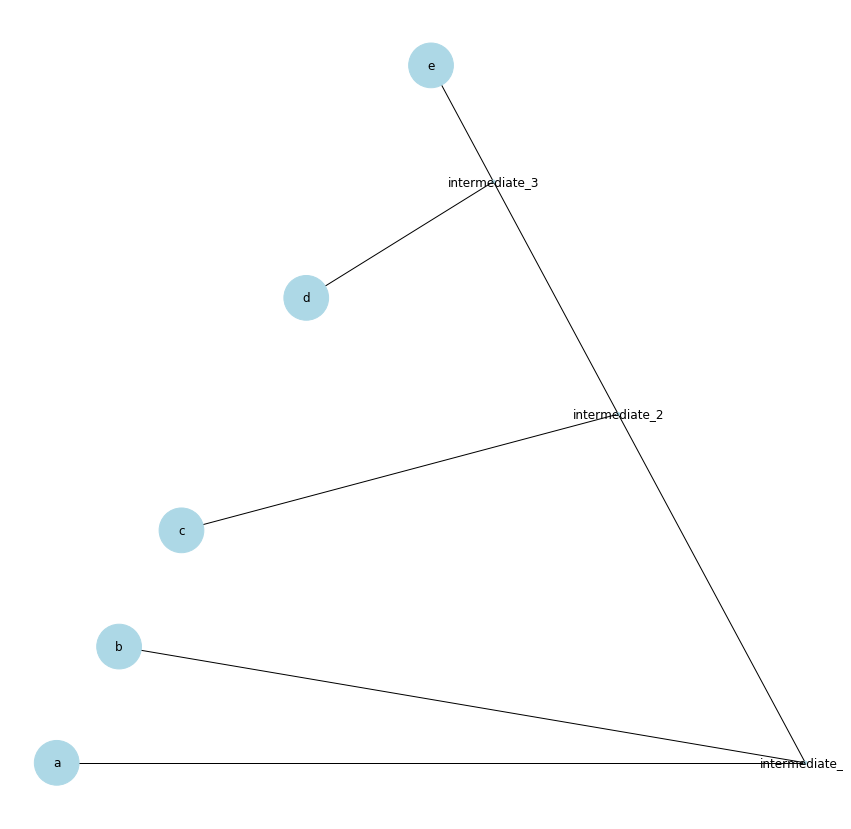

In [357]:
draw_graph_nice(G)

In [523]:
# Get sequences
sequences, seq_names = utils.get_sequences_for_ancestry()

In [524]:
scores = []
names = []
d = np.zeros((len(sequences), len(sequences)))
for i in range(len(sequences)): 
    for j in range(len(sequences)): 
        if i == j: 
            continue
        d[i][j] = showAlignmentG(sequences[i], sequences[j], affineGap, simpleMatch)[1][2]
#     scores.append(showAlignmentG(sequences[i], sequences[i+1], affineGap, simpleMatch)[1][2])
    names.append(seq_names[i])
# scores.append(showAlignmentG(sequences[0], sequences[-1], affineGap, simpleMatch)[1][2])
# names.append(seq_names[len(seq_names)-1])
print(scores)
print(names)

TGCACTCTCAGATC-C-TCA--TCTCGTTTCCA--TA---GTTC
gGCgCT-TC-GtTCGCGTaAAGTCcC----CCACCTACCGG---
5.2
TGCAC----TCTCAGATCCTCATCTC-GT-TTCCATAG-TTC
---ACAATATCTCgGAaC--CAcCaCAGTGcTC--TAGATaC
7.6
-TGCACTCT--CAGATCCTCATCTCGTTTCCATAGT------TC
TTGC---gTGGCAGAaCCT-AaCcCG-----AcAGTAGGCACTa
5.6
TGCA-CTCTCAGATCCTCAT---CT----CGTTTCCA----TAGTTC
T-CAGC-----G-TCCgC-TAGGCTAAGGCGT---gAAGAGTAG-cC
4.2
TGC-ACTCTCAGATCCTCATC-TCGT----TTCCATA--G--TTC
TcCGAC---C-GA--CT-AgCTTCGTACACTgCCA-ACCGCAT--
6.199999999999999
T---GCACT-CTCAGAT-CCTCA---TCTCGTTTCCATAGTTC
TGACGCA-TGCT-A-ATGCCcCAAAGTCTCG---aCA-AG-TC
11.799999999999999
-TGCAC-TCTCAGATCCTCATCTCGTT---TC--CATAG-TTC--
TTG-ACGT---AGATCC----C-CGTTGCATCGACA-AGCaTCAA
10.2
TGCACTCTCA--GATCCTCATCTCGT-T-TCCATAGTT---C
---AgT-TCAGGGATtgTaAT-TCGTCTGT--AgAGTTGGGC
8.799999999999999
TGCAC--TCTCAGATCCTCATCTCGTT---T--CCATA---G---TT-C
---ACAAT----GA-----A--TgGTTGAATTGCCATACACGCGCTTAa
3.4
TGCACTCTCAGATCCTCA----TCTCGT-TTCCAT------AGTTC
TG---T---gGtTCCT-ACCTGTCgCGTCTT---TAAGGAAAG-TC
7.1999

TCCGACCGACTAGCTTCGTA--------CACTGCCAACCGCAT---
----AgCaACTAG----GTAATAAATTGCA-TGC--AggGCgTTCC
4.800000000000001
TC-CGACC--G--ACTA--GC------TTCGTACACTGCCAACCGCAT
-CACG--CATGTTAtTATGGCCCTCTATT-GTA---TGCC-----C-T
6.0
TG-ACGCATGCT-A-ATGCCCCAAAGTCTCG---ACA-AG-TC
TGCAC---T-CTCAGAT-CCtCA---TCTCGTTTcCATAGTTC
11.799999999999999
TGACGCAT-----GC-TAA--TGCCCCAAAGTCTCGACAAGTC--
-GgCGCtTCGTTCGCGTAAAGTcCCCCA----C-CtAC----CGG
6.6
TGAC---GCATGCT---AATGCC-CCAAAGT-CTC--GACAAGTC
--ACAAT--AT-CTCGGAA--CCACCAcAGTGCTCTAGAtA---C
9.0
-TGAC---GCATGCTAATGCCCCAAAGTCTCGACA--AG----TC
TTG-CGTGGCA-G--AA----CCtAA--CcCGACAGTAGGCACTa
7.799999999999999
TGA-----CGC-ATGCTAATGCCCCAAAGTCTCGACA-AGT---C
TcAGCGTCCGCTAgGCTAAgGC------GT---GA-AGAGTAGCC
9.399999999999999
T--GA-CG-C-ATGC----TA-A-TGCCCCAAAGTCTCGACAAGTC
TCCGACCGACTA-GCTTCGTACACTG--CCAA---C-CG-CA--T-
8.399999999999999
-TGACGCATGCTA-ATGCCCCAAAGT--C-TCGACAAG--TC--
TTGACG-----TAGAT-CCCC---GTTGCATCGACAAGCATCAA
15.199999999999996
TGACG--CA-----TGCTAATGCCCCAAAGTCTCG-ACAAGT----

------TGTGT-TGTA--GCCAAAGCCGAATAATCTAAT-TAA---CG
CACGCATGT-TAT-TATGGC-----CC------TCTAtTGTAtGCCCt
3.5999999999999996
TACAAC---CA-AGCAAGCTGCAGGT---GT----A-ACGCGGTTGA
TgC-ACTCTCAGAtC---CT-CA--TCTCGTTTCCATA----GTT-c
3.4000000000000004
TACAACCAAGCAAGCT------GCAGGT---GT-----A---ACGCGGTTGA
--------gGC--GCTTCGTTCGC--GTAAAGTCCCCCACCTAC-CGG----
2.0
TACAA---C-C--AAGCA----AGCTGCAGGTGTAACGCGGTTGA-
-ACAATATCTCGGAAcCACCACAG-TGC---TcTA-----GaT-AC
5.6
T--------ACAACC-AAGCAAGCTG-CAGGTGTA---ACGCGGTTGA
TTGCGTGGCAgAACCTAA-C---CcGACA---GTAGGCAC-----T-A
5.6
TACAAC--CAAGCAAGCTGCAGGTGTAACGCGGTTGA---------
T-CAgCGTC---C--GCT--AGG-cTAAgGCG--TGAAGAGTAGCC
7.2
TACAACCAAGCAAGCT--G--CAGGTG-TAA-CGCGGTTGA-
TcCgACCgA-CtAGCTTCGTACA-cTGCcAACCGC-----AT
6.8
T-ACAACCAAGCAAGCTGCAGGTGTAACGC-----GGT-T-GA------
TGAC------GCA---TGC-----TAAtGCCCCAAaGTCTCGACAAGTC
5.0
T--AC--A-A--CCAAGCAAGCTGCAGGT-GTAAC--GCGGTTGA
TTGACGTAGATCCC---C--GtTGCA--TCG--ACAAGC-aTcaA
4.2
TACAACCAAGCAAGCTGCAGG---TGTAA--CG-C----G-GTT--GA
------------AG-TtCAGG

In [525]:

d

array([[ 0. ,  5.2,  7.6,  5.6,  4.2,  6.2, 11.8, 10.2,  8.8,  3.4,  7.2,
         3.8,  3.4,  6. ,  5.6],
       [ 5.2,  0. ,  4.8,  5.4,  5. ,  6.4,  6.6,  4.8,  5.6,  2.6,  6.6,
         5. ,  2. ,  1.2,  2.8],
       [ 7.6,  4.8,  0. ,  9.8,  4.6,  6.2,  9. ,  5. ,  5. , 11.2,  5.2,
         4.8,  5.6,  7.2,  5.4],
       [ 5.6,  5.4,  9.8,  0. ,  8.2,  5.4,  7.8, 12.8,  4.4,  5. ,  6.8,
         8.6,  5.6,  2. ,  4.2],
       [ 4.2,  5. ,  4.6,  8.2,  0. ,  8.8,  9.4,  4.2,  7.8,  2.8,  9. ,
         5.2,  7.2,  7.4,  5.8],
       [ 6.2,  6.4,  6.2,  5.4,  8.8,  0. ,  8.4,  9. ,  2.2,  6.6,  4.2,
         6. ,  6.8,  4.8,  6. ],
       [11.8,  6.6,  9. ,  7.8,  9.4,  8.4,  0. , 15.2,  6.2,  6.8,  9.8,
         7.6,  5. ,  6.6,  9.4],
       [10.2,  4.8,  5. , 12.8,  4.2,  9. , 15.2,  0. ,  3.4,  6.8,  9.8,
         6.8,  4.2,  4.8,  3. ],
       [ 8.8,  5.6,  5. ,  4.4,  7.8,  2.2,  6.2,  3.4,  0. ,  6. ,  7.2,
         3.6,  6.4,  7.8,  6. ],
       [ 3.4,  2.6, 11.2,  5. ,  2.8,

In [526]:
G = construct_alignment(d, names)

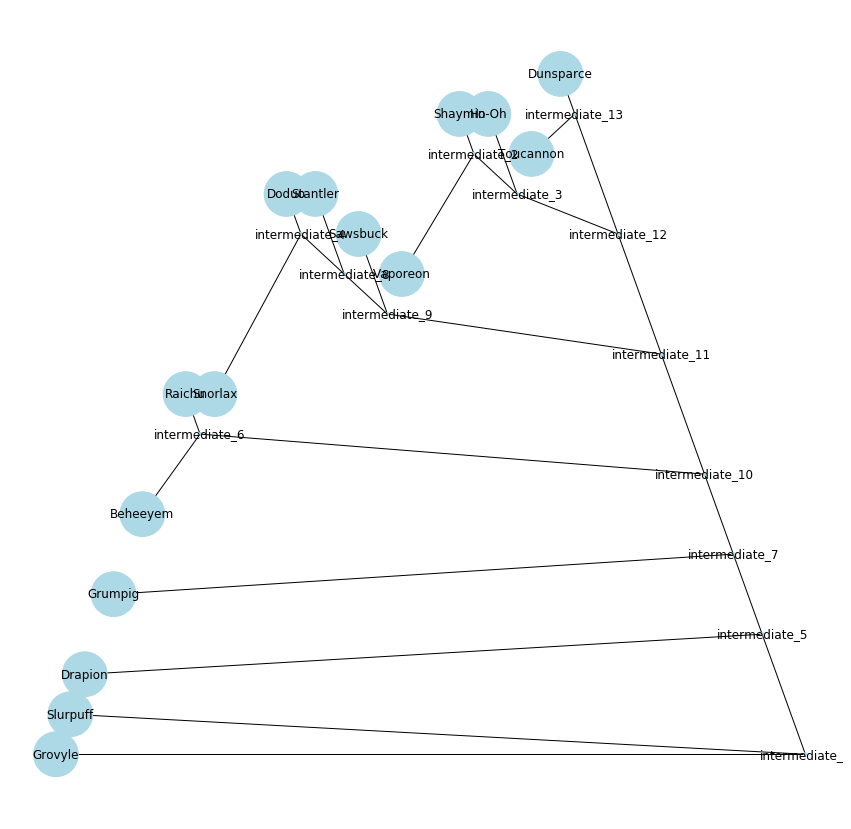

In [527]:
draw_graph_nice(G)

<div class="alert alert-success">
    
**Problem 4 (b).** Given $n$ sequences each of roughly the same length $m$, what would the time complexity be for constructing such a phylogenetic tree? Can you think of any algorithms or heuristics that might make the process faster? 
    
</div>

The neighbor joining algorithm is $\theta(n^{2})$ because you go through the while loop n times (the number of nodes aka the n sequences) and each time through you do a summation of n things. The alignment score function has roughly $\theta(m^{2})$ as it has a for loop within a while loop. Therefore, the time complexity for constructing a phylogenetic tree is roughly $\theta(n^{2} + m^{2})$.

Vectorization would likely make this process faster. Vectorizing the summation would speed it up. 

<div class="alert alert-success">

**Problem 4 (c).** Assume a direct correlation between the distance between any two nodes and the number of years (in millions) between their evolution. Assuming `Grumpig` was the first Pokémon to evolve, when did life first come to be in the fictional scenario?
</div>

<div class="alert alert-warning">

For this part, feel free to use any of `networkx`'s in-built functions (or any graph-specific library you may have chosen for Problem 4).
</div>

In [528]:
# Your code here
path = list(nx.dfs_edges(G, source='Grumpig'))

In [531]:
path

[('Grumpig', 'intermediate_7'),
 ('intermediate_7', 'intermediate_5'),
 ('intermediate_5', 'intermediate_1'),
 ('intermediate_1', 'Grovyle'),
 ('intermediate_1', 'Slurpuff'),
 ('intermediate_5', 'Drapion'),
 ('intermediate_7', 'intermediate_10'),
 ('intermediate_10', 'intermediate_6'),
 ('intermediate_6', 'Beheeyem'),
 ('intermediate_6', 'Raichu'),
 ('intermediate_10', 'intermediate_11'),
 ('intermediate_11', 'intermediate_9'),
 ('intermediate_9', 'intermediate_8'),
 ('intermediate_8', 'intermediate_4'),
 ('intermediate_4', 'Snorlax'),
 ('intermediate_4', 'Doduo'),
 ('intermediate_8', 'Stantler'),
 ('intermediate_9', 'Sawsbuck'),
 ('intermediate_11', 'intermediate_12'),
 ('intermediate_12', 'intermediate_3'),
 ('intermediate_3', 'intermediate_2'),
 ('intermediate_2', 'Vaporeon'),
 ('intermediate_2', 'Shaymin'),
 ('intermediate_3', 'Ho-Oh'),
 ('intermediate_12', 'intermediate_13'),
 ('intermediate_13', 'Toucannon'),
 ('intermediate_13', 'Dunsparce')]

In [530]:
how_long_ago = str(s) # Replace with your answer
print(f"Life evolved {how_long_ago} million years ago in the Pokémon world")

Life evolved 0 million years ago in the Pokémon world


One way to test the robustness of such a tree reconstruction algorithm is to consider collection of nodes independently and see if the recontructed sub-trees match the bigger tree.

<div class="alert alert-success">
    
**Problem 4 (d).** Find an  edge between intermediate nodes with the largest weight in the phylogenetic tree and remove that edge- this will produce two disjoint cluster of nodes. Re-run your tree reconstruction algorithm on these two sets of Pokémons. Do your reconstructed tree match the larger phylogenetic tree?
</div>

<div class="alert alert-warning">

For this part, feel free to use any of `networkx`'s in-built functions (or any graph-specific library you may have chosen for Problem 4).
</div>

In [532]:
G.edges(data=True)
interEdges = []
for i in G.edges(data=True): 
    if 'intermediate' in i[0] and 'intermediate' in i[1]:  
        interEdges.append(i)

In [533]:
interEdges

[('intermediate_1', 'intermediate_5', {'weight': 3.6000000000000005}),
 ('intermediate_2', 'intermediate_3', {'weight': 2.4000000000000004}),
 ('intermediate_3', 'intermediate_12', {'weight': 1.6625000000000008}),
 ('intermediate_4', 'intermediate_8', {'weight': 3.299999999999999}),
 ('intermediate_5', 'intermediate_7', {'weight': 2.7499999999999996}),
 ('intermediate_6', 'intermediate_10', {'weight': 2.175}),
 ('intermediate_7', 'intermediate_10', {'weight': 2.175}),
 ('intermediate_8', 'intermediate_9', {'weight': 2.500000000000001}),
 ('intermediate_9', 'intermediate_11', {'weight': 0.9187499999999988}),
 ('intermediate_10', 'intermediate_11', {'weight': 0.9187499999999988}),
 ('intermediate_11', 'intermediate_12', {'weight': 1.6625000000000008}),
 ('intermediate_12', 'intermediate_13', {'weight': 1.3859374999999994})]

In [534]:
maxEdge = interEdges[0]
G.remove_edge(maxEdge[0],maxEdge[1])

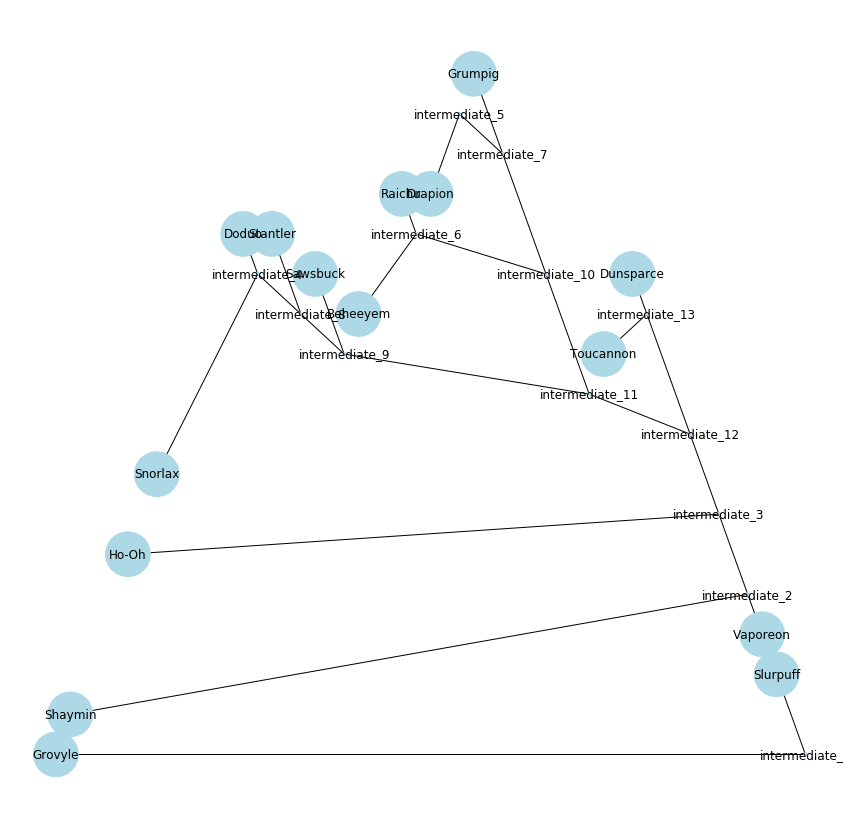

In [535]:
draw_graph_nice(G)

In [427]:
names1 = ['Snorlax', 'Stantler']
i1 = names.index(names1[0])
i2 = names.index(names1[1])
scores1 = [scores[i1], scores[i2]]

In [428]:
names.remove('Snorlax')
names.remove('Stantler')
scores.remove(scores[i1])
scores.remove(scores[i2])

In [429]:
names

['Ho-Oh',
 'Toucannon',
 'Drapion',
 'Vaporeon',
 'Grumpig',
 'Beheeyem',
 'Doduo',
 'Shaymin',
 'Grovyle',
 'Sawsbuck',
 'Dunsparce',
 'Slurpuff',
 'Raichu']

In [430]:
scores

[5.2,
 4.799999999999999,
 8.2,
 8.8,
 8.399999999999999,
 15.199999999999996,
 6.0,
 8.4,
 7.8,
 5.0,
 9.0,
 6.6,
 5.6]

In [431]:
d1 = np.zeros((len(names1), len(names1)))
for i in range(len(names1)-1):
    for j in range(len(names1)-1): 
        if scores1[j+1] != scores1[i]:
            d1[i,j+1] = scores1[j]
            d1[j+1,i] = scores1[j]

In [432]:
d1

array([[0. , 3.4],
       [3.4, 0. ]])

In [433]:
G1 = construct_alignment(d1, names1)

In [434]:
d2 = np.zeros((len(names), len(names)))
for i in range(len(names)-1):
    for j in range(len(names)-1): 
        if scores[j+1] != scores[i]:
            d2[i,j+1] = scores[j]
            d2[j+1,i] = scores[j]

In [435]:
G2 = construct_alignment(d2,names)

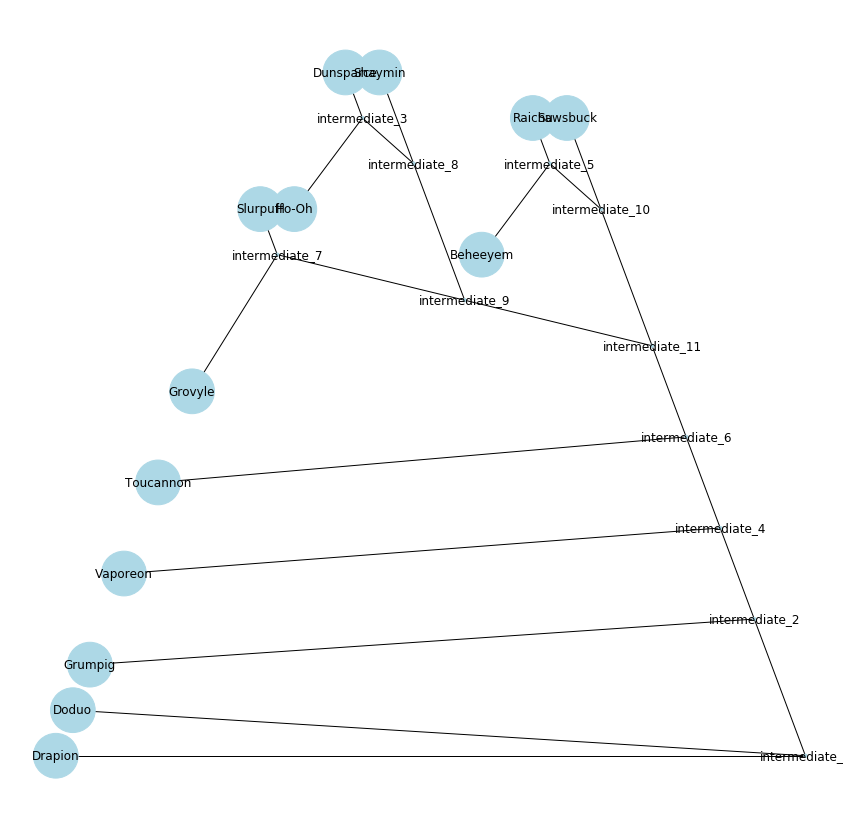

In [436]:
draw_graph_nice(G2)

The edge we remove separated only 2 nodes from the larger tree. When we rerun the alignment construction on the larger portion of the tree, we get a new tree that is quite different from our original tree. 

<div class="alert alert-success">

**Problem 4 (d).** Can you inspect the matrix of distances between the Pokémons and predict whether the reconstructed trees would always be unique? Why/why not?
</div>

In [437]:
d

array([[ 0. ,  5.2,  4.8,  9.8,  8.2,  8.8,  8.4, 15.2,  3.4,  6. ,  8.4,
         7.8,  5. ,  9. ,  6.6],
       [ 0. ,  0. ,  4.8,  9.8,  8.2,  8.8,  8.4, 15.2,  3.4,  6. ,  8.4,
         7.8,  5. ,  9. ,  6.6],
       [ 0. ,  5.2,  0. ,  9.8,  8.2,  8.8,  8.4, 15.2,  3.4,  6. ,  8.4,
         7.8,  5. ,  9. ,  6.6],
       [ 0. ,  5.2,  4.8,  0. ,  8.2,  8.8,  8.4, 15.2,  3.4,  6. ,  8.4,
         7.8,  5. ,  9. ,  6.6],
       [ 0. ,  5.2,  4.8,  9.8,  0. ,  8.8,  8.4, 15.2,  3.4,  6. ,  8.4,
         7.8,  5. ,  9. ,  6.6],
       [ 0. ,  5.2,  4.8,  9.8,  8.2,  0. ,  8.4, 15.2,  3.4,  6. ,  8.4,
         7.8,  5. ,  9. ,  6.6],
       [ 0. ,  5.2,  4.8,  9.8,  8.2,  8.8,  0. , 15.2,  3.4,  6. ,  8.4,
         7.8,  5. ,  9. ,  6.6],
       [ 0. ,  5.2,  4.8,  9.8,  8.2,  8.8,  8.4,  0. ,  3.4,  6. ,  8.4,
         7.8,  5. ,  9. ,  6.6],
       [ 0. ,  5.2,  4.8,  9.8,  8.2,  8.8,  8.4, 15.2,  0. ,  6. ,  8.4,
         7.8,  5. ,  9. ,  6.6],
       [ 0. ,  5.2,  4.8,  9.8,  8.2,

## Part 5: Tracing Evolution

<div class="alert alert-warning">
    This problem is a "Challenge Problem". This means it is a problem of unknown difficulty that might be quite challenging (unlike the earlier problems, we don't have a reference solution for this one, or a clear idea how hard it might be). We do hope all students will at least attempt this and that more ambitious students will work hard to solve it and learn interesting things by the attempt (whether or not it is successful), but not get frustrated if you can't get to the desired answer.  As a "Challenge Problem" it means that you shouldn't be worried if you are not able to solve this, though, and you can get full expected credit on this assignment without answering it.
</div>


Now that we can construct Phylogenetic trees using sequence alignment, we can attempt to construct these trees for different organisms and trace their evolution through time. You're given reads processed from a FASTA file for Hemoglobin Beta Proteins, which can be used to then trace evolution based on how similar their sequences are across organisms from different kingdoms. Each record has the following relevant information in Tuple format:

`((uniprot identifier, full name, shortened name, group), (sequence))`

As you may notice, running our nearest-neighbor reconstruction algorithm on this data will give a Phylogenetic tree that does not fully correspond to what we know about the evolution of these species.

<div class="alert alert-success">
    
**Problem 8 (Challenge).** Construct a Phylogenetic Tree using the given sequences. Implement and use any tree-reconstruction method of your choice, and see if it works better than the nearest-neighbor method with a linear-gap penalty.
    
For visualization, use the short name to display in the evolution tree.
    
</div>
    
This is an open-ended question, and is inspired by https://www.mimuw.edu.pl/~lukaskoz/teaching/sad2/lab6/readme.html. You are free to use any approach to deal with the issue. Make sure you provide your code, along with any assumptions you may have.

In [33]:
sequences = utils.get_sequences_for_tree()
print(sequences[0])

(('P01941.1', 'Tupaia glis', 'Tgli', 'Mammalia'), 'VLSPGDKSNIKAAWGKIGGQAPQYGAEALERMFLSFPTTKTYFPHFDMSHGSAQIQAHGKKVADALSTAVGHLDDLPTALSALSDLHAHKLRVDPANFKLLSHCILVTLACHHPGDFTPEIHASLDKFLANVSTVLTSKYR')


In [ ]:
# Your code here

_Write a description of your algorithm, and things you learned from working on this here._

_Type your answer here_

<div class="alert alert-success">
    
Is this (using Hemoglobin proteins) the best way to trace and visualize evolution? Why do you think it is useful, and what could the possible downsides of this be?
    
</div>

_Type your answer here_

   <div class="alert alert-block alert-danger">
    <center>
      
**End of Project 2!**
        
Remember to follow the submission directions above to submit your assignment.
    
 </center>
 </div>